In [2]:
from ecephys.plot.plot import _lfp_explorer
import ecephys_analyses as ea
from sglxarray import load_trigger
from ecephys.signal.utils import mean_subtract, median_subtract
import matplotlib.pyplot as plt

In [3]:
import numpy as np

def glb_dmx(sig, sort_by_channel_label=False):
    n_chans = 384 #Number of total channels
    n_adcs = 24 # Number of ADCs
    n_chans_per_adc = n_chans / n_adcs
    adcs = np.tile(np.arange(n_chans_per_adc), n_adcs)
    _sig = sig.sortby('channel') if sort_by_channel_label else sig.copy()
    _sig = _sig.assign_coords(adc=('channel', adcs))
    adc_avgs = _sig.groupby('adc').mean()
    _sig = _sig - np.tile(adc_avgs, n_adcs)
    return _sig.reindex_like(sig) if sort_by_channel_label else _sig


In [4]:
from pathlib import PureWindowsPath

paths = [
    r"\Volumes\neuropixel_archive\Data\acute\ANPIX16-629\8-30-2021_g0_t0.exported.imec0.ap.bin", 
    r"\Volumes\neuropixel_archive\Data\acute\ANPIX16-629\8-30-2021_g0_t0.exported.imec1.ap.bin",
    r"\Volumes\neuropixel_archive\Data\acute\ANPIX16-629\8-30-2021_g0_t0.exported.imec2.ap.bin",
    r"\Volumes\neuropixel_archive\Data\acute\ANPIX16-629\8-30-2021_g0_t0.exported.imec3.ap.bin",
    r"\Volumes\neuropixel_archive\Data\acute\ANPIX16-629\8-30-2021_g0_t0.exported.imec4.ap.bin",
    r"\Volumes\neuropixel_archive\Data\acute\Explorer-3146\12-2-2020_ABCDE_g0_t0.exported.imec1.ap.bin",
]

paths = [PureWindowsPath(p).as_posix() for p in paths]
nProbes = len(paths)

In [5]:
nCh = 384
chans = np.arange(nCh)

START_TIME = 0
sigs = [load_trigger(p, chans, start_time=(START_TIME), end_time=(START_TIME + 1.0)) for p in paths]
sigs = [glb_dmx(mean_subtract(s)) for s in sigs]

nChan: 385, nFileSamp: 30000
nChan: 385, nFileSamp: 30000
nChan: 385, nFileSamp: 29999
nChan: 385, nFileSamp: 30000
nChan: 385, nFileSamp: 30000
nChan: 385, nFileSamp: 30000


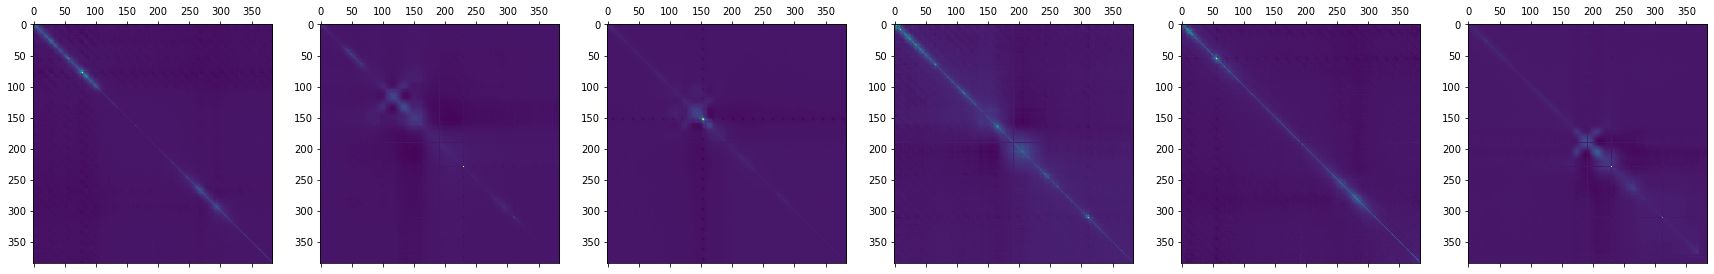

In [6]:
fig, axes = plt.subplots(1, nProbes, figsize=(nProbes * 5, 5))
for ax, sig in zip(axes, sigs):
    ax.matshow(np.cov(sig.values.T))

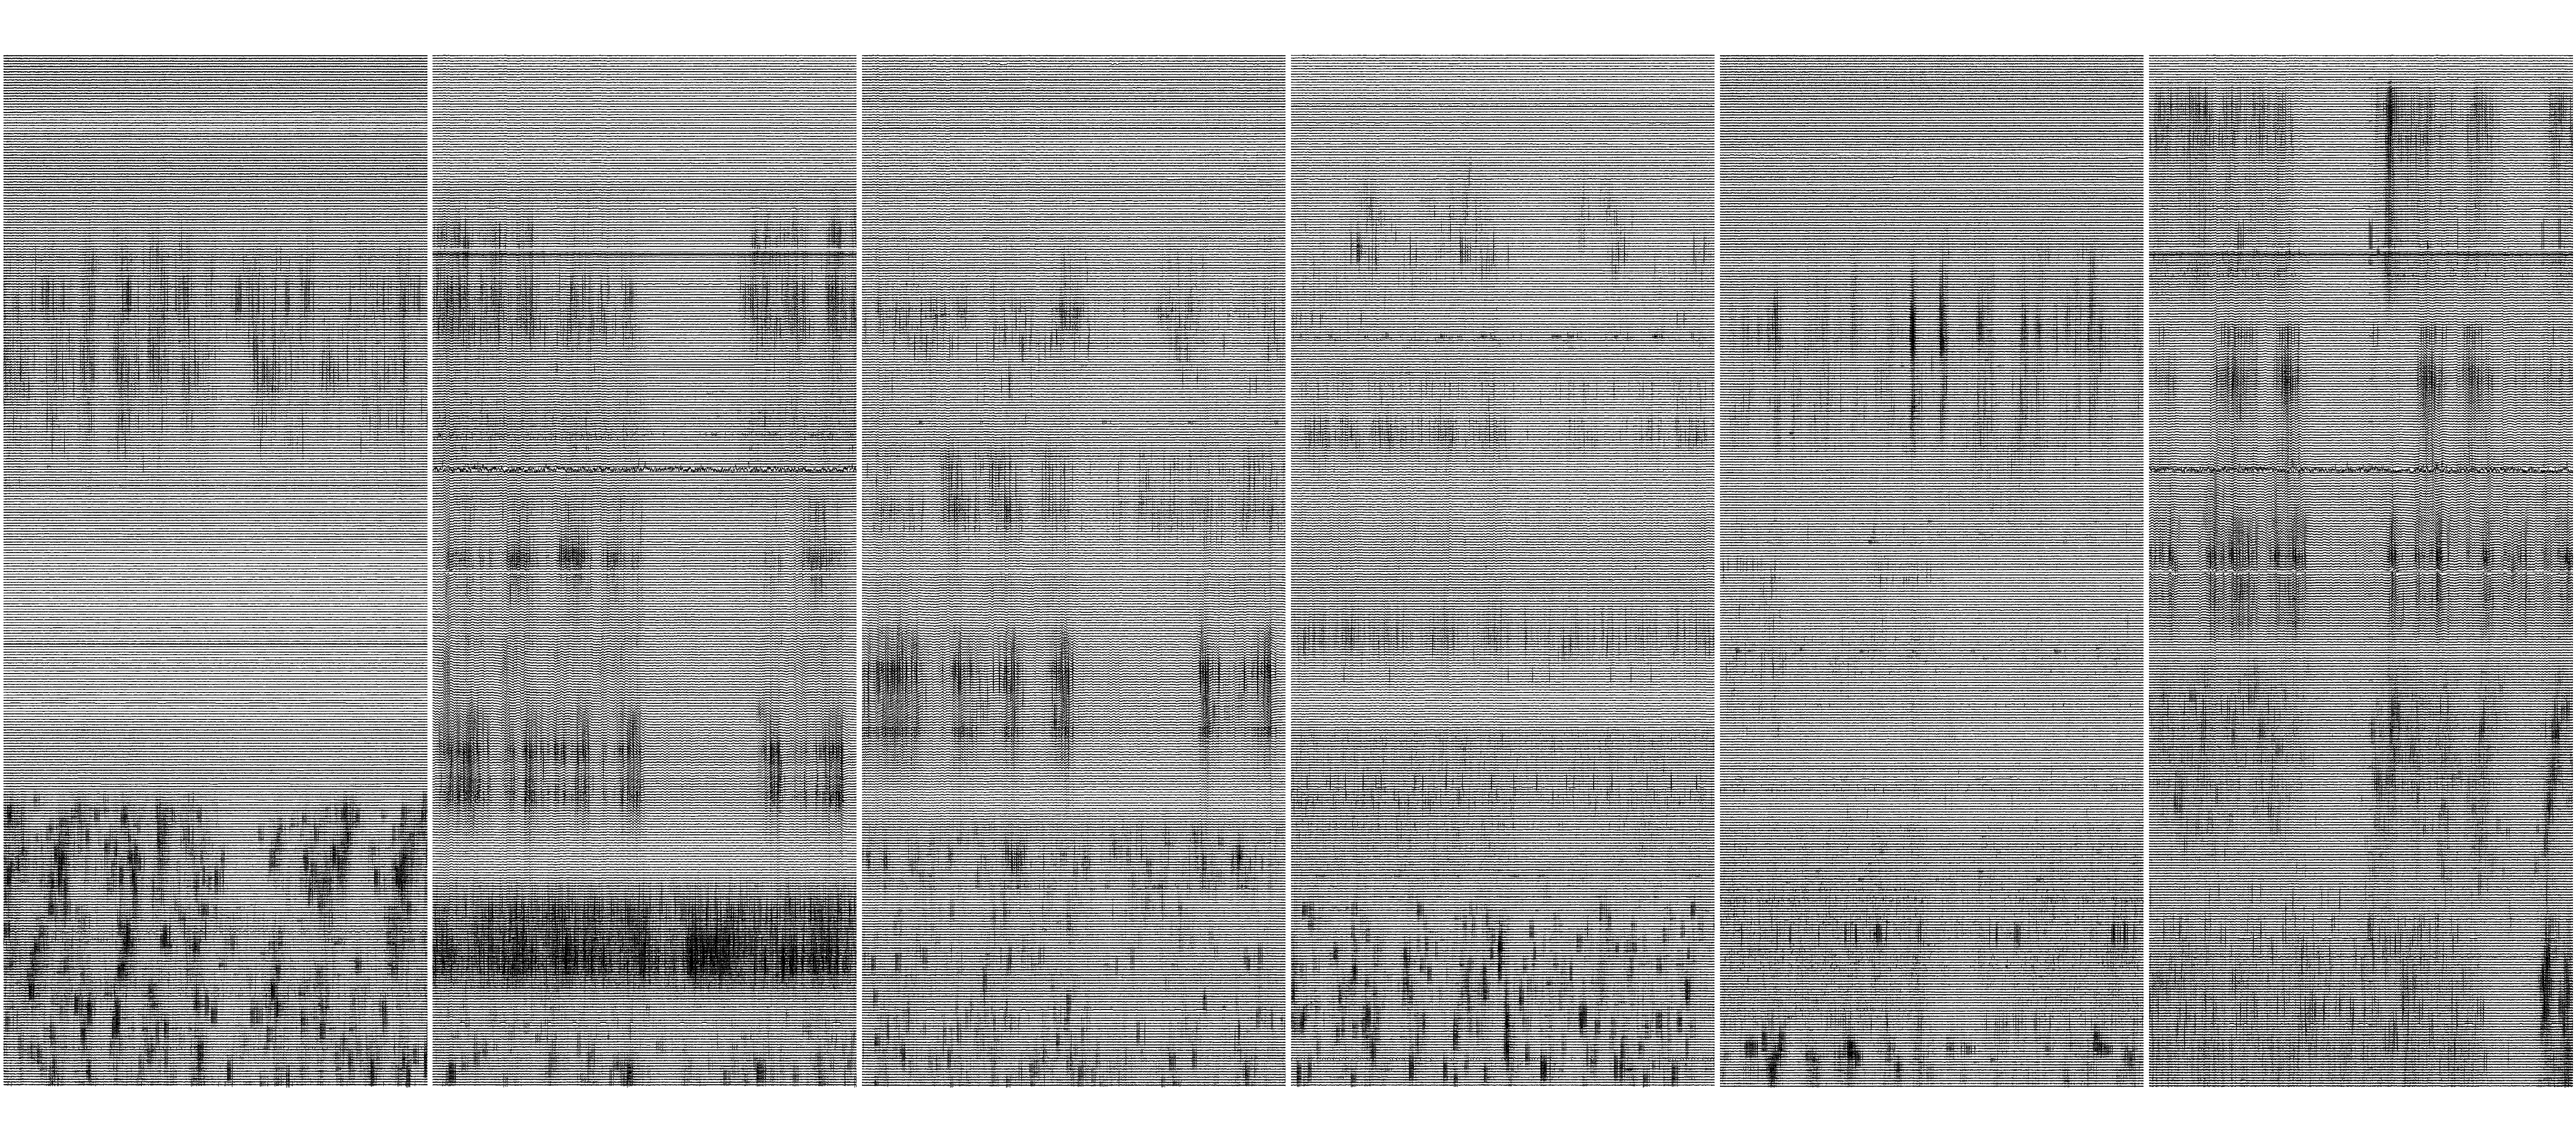

In [15]:
fig, axes = plt.subplots(1, nProbes, figsize=(nProbes * 12, 32))
for ax, sig in zip(axes, sigs):
    _lfp_explorer(sig.time.values, sig.values, ax, chan_labels=['']*nCh, window_length=1.0, window_start=0.0, n_plot_chans=nCh, i_chan=0, vspace=200, zero_mean=False, flip_dv=True)
    ax.axis('off')
fig.tight_layout()

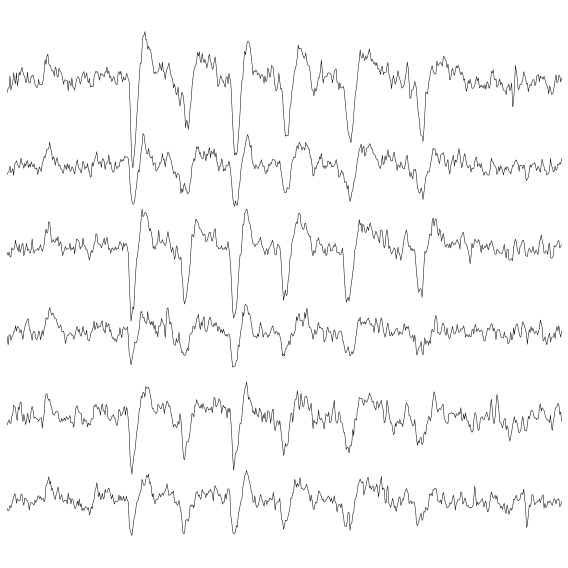

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
_lfp_explorer(sigs[0].time.values, sigs[0].values, ax, chan_labels=['']*nCh, window_length=0.02, window_start=0.0, n_plot_chans=6, i_chan=20, vspace=200, zero_mean=False, flip_dv=True)
ax.axis('off')
fig.tight_layout()